<a href="https://colab.research.google.com/github/ashokkondhalkar/CAPSTONE-2-Yes-bank-stock-closing-price-predication/blob/main/Project_Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name** - Yes Bank Stock Closing Price Prediction

Project Type - Regression

Contribution - Individual

Ashok Kondhalkar


**Problem Statement**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

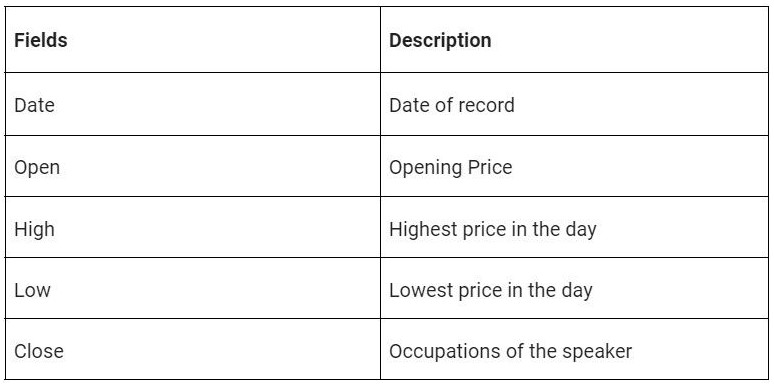

***Let's Begin !***

***Work on Dataset***

In [1]:
#importing the import libraries

In [80]:
# Do not disturb mode
import warnings  
warnings.filterwarnings('ignore')

import numpy as np                               
import pandas as pd                                   
import math

# visualize with plots
import matplotlib.pyplot as plt                        
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-white')
import plotly.express as px 

 # working with dates with style
from dateutil.relativedelta import relativedelta      
 # to convert to date and computational cost
from datetime import datetime    

# scale the data
from sklearn.preprocessing import (MinMaxScaler,StandardScaler)         
# split train and test data
from sklearn.model_selection import train_test_split  

from sklearn.model_selection import (cross_val_score, GridSearchCV, 
                                     RandomizedSearchCV, TimeSeriesSplit)

# Regression problem
import statsmodels.api as sm
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, ElasticNet, 
                                  LassoCV, RidgeCV, ElasticNetCV)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, ExtraTreesRegressor, 
                              GradientBoostingRegressor, AdaBoostRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor                      
   

 # import required metrics
from sklearn.metrics import (r2_score,
                             mean_squared_error, 
                             mean_absolute_percentage_error,
                             mean_absolute_error)

 # statistics and econometrics
from statsmodels.tsa.stattools import adfuller        
import statsmodels.formula.api as smf                  
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
     

Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Modules/machine_learning/capstone_2_data/data_YesBank_StockPrices.csv')


Dataset First View

In [5]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(185, 5)

Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [8]:
# convert string object to datetime object
df['Date'] = pd.to_datetime(df['Date'], format="%b-%y")
print(df['Date'].dtypes)

datetime64[ns]


In [9]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


Find Duplicate Values

In [10]:
# Dataset Duplicate Value Count
print("Total Duplicate values count:" ,len(df[df.duplicated()]))

Total Duplicate values count: 0


In [11]:
#Great!!! There is no any duplicated value

Find Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
print("Total Missing Values/Null Values Count: ", df.isnull().sum().sum())

Total Missing Values/Null Values Count:  0


In [13]:
#Great!!! There is no any null value or missing values in dataset

**Understanding Your Variables**

In [14]:
# Find Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [15]:
# Find Dataset Describe
df.describe() 

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


**Check Unique Values for each variable**

In [16]:
# Check Unique Values for Date variable.
#print(df['Date'].unique())
print("No.of Date unique values :", 
      len(df['Date'].unique()))

No.of Date unique values : 185


In [17]:
# Check Unique Values for Open variable.
print(df['Open'].unique())

print("No.of Open unique values :", 
      len(df['Open'].unique()))

[ 13.    12.58  13.48  13.2   13.35  13.49  13.68  15.5   16.2   20.56
  19.8   18.2   16.    15.9   18.    18.78  22.8   25.4   27.4   30.2
  29.3   27.    30.66  33.89  35.98  37.5   37.4   41.8   44.4   46.4
  49.99  50.88  48.9   33.9   34.3   31.22  22.85  25.    26.68  24.6
  14.79  12.4   15.28  12.19  10.    10.04  15.94  25.6   29.7   31.98
  33.8   41.2   46.58  50.98  53.6   49.    47.8   50.67  56.94  56.7
  53.55  59.4   62.8   70.9   72.2   61.8   62.98  53.    51.84  62.
  61.26  60.4   63.    62.9   56.    53.8   62.2   57.    47.92  65.9
  69.    73.62  70.4   65.45  68.15  73.    66.2   76.4   82.54  89.2
  93.2  104.41  94.    85.7  100.99  99.    92.4   66.    49.2   58.
  74.    74.4   74.74  61.54  60.52  83.45  88.8  114.8  108.43 107.4
 114.6  112.1  137.1  142.08 154.4  172.5  174.8  162.8  170.   177.
 169.   165.9  135.61 146.96 151.73 153.   145.   150.4  138.8  172.02
 189.8  206.4  221.96 244.   273.3  253.41 255.   235.4  231.98 280.4
 290.6  309.6  326. 

In [18]:
# Check Unique Values for High variable.
print(df['High'].unique())
print("No.of High unique values :", 
      len(df['High'].unique()))
     

[ 14.    14.88  14.87  14.47  13.88  14.44  17.16  16.97  20.95  20.8
  21.8   18.4   17.2   18.6   18.88  24.2   28.47  29.66  34.16  32.6
  31.58  31.99  36.14  36.38  41.04  39.    41.75  47.3   50.98  54.
  55.56  53.97  48.9   35.8   36.88  32.22  30.5   28.98  29.8   25.
  17.8   16.56  18.34  12.5   11.24  17.51  28.84  31.08  33.16  35.18
  41.3   52.34  54.98  55.67  57.58  51.48  52.06  59.48  58.08  59.9
  60.94  68.88  71.74  76.    77.6   68.36  63.54  57.69  65.2   68.26
  61.68  63.39  68.    63.96  60.08  64.8   63.7   59.8   66.5   74.8
  77.88  76.1   70.59  70.6   73.19  74.78  77.69  84.2   89.6   95.
 107.   107.8  100.15 101.8  109.43 102.94 100.4   67.81  78.94  76.44
  77.27  83.    76.35  62.7   83.36  94.98 117.6  117.57 114.46 118.69
 126.85 137.8  143.91 155.   179.   173.88 182.   172.8  176.96 179.4
 175.58 169.19 155.5  155.94 157.96 154.52 149.9  157.85 175.12 190.44
 209.   223.   247.18 275.   290.   265.5  262.72 245.   284.31 294.19
 311.57 330.58 33

In [19]:
# Check Unique Values for Low variable.
print(df['Low'].unique())
print("No.of Low unique values :", 
      len(df['Low'].unique()))

[ 11.25  12.55  12.27  12.4   12.88  13.    13.58  15.4   16.02  18.02
  15.8   13.4   13.82  15.7   16.8   18.5   21.4   24.4   27.    26.8
  23.31  26.2   29.11  30.4   35.02  30.2   35.3   33.6   40.02  45.
  30.24  44.4   24.11  28.51  30.03  22.62  20.4   24.62  21.7   11.01
  11.13  11.48   9.9    8.16   9.94  14.76  23.    24.83  29.    32.
  36.8   42.84  48.6   46.42  44.6   47.3   48.8   50.66  52.6   53.02
  59.01  62.51  68.21  58.    55.44  49.39  46.71  50.8   60.5   54.5
  54.8   61.36  50.51  51.2   48.1   52.04  47.4   46.11  63.6   66.2
  69.11  58.85  62.14  67.57  65.27  64.46  75.6   82.22  88.01  93.2
  93.4   83.42  83.43  97.2   87.15  57.71  43.22  44.8   56.08  64.65
  71.63  60.8   58.42  60.34  80.8   86.98 101.62 100.44 103.31 107.18
 109.2  132.44 134.   150.47 156.1  156.8  154.53 157.8  158.9  156.45
 118.   127.   141.73 144.03 133.71 126.45 132.74 138.35 165.33 181.28
 201.14 221.35 240.68 231.2  245.8  219.1  218.25 226.3  275.61 283.6
 300.2  275.15 

In [20]:
# Check Unique Values for Close variable.
print(df['Close'].unique())
print("No.of Close unique values :", 
      len(df['Close'].unique()))

[ 12.46  13.42  13.3   12.99  13.41  13.71  15.33  16.12  20.08  19.49
  18.03  15.62  16.16  17.84  18.46  22.78  25.32  26.97  30.16  28.63
  28.14  30.31  33.51  35.98  37.93  36.99  41.36  43.48  46.18  49.81
  50.54  49.42  33.75  34.06  31.13  22.85  25.45  26.83  24.13  13.58
  12.26  15.03  12.24  10.26   9.98  15.45  25.12  29.68  31.93  33.45
  40.99  47.31  50.57  53.41  49.84  47.32  50.97  57.1   57.57  53.83
  58.99  62.22  70.3   71.86  61.21  62.54  52.59  51.29  61.98  61.02
  60.07  62.38  62.13  55.61  54.5   62.9   54.49  47.72  65.99  69.14
  73.46  70.07  66.02  67.83  72.85  65.97  76.44  82.29  88.48  92.84
 104.41  94.5   85.71 100.28  97.49  92.2   64.76  48.65  57.5   73.76
  73.74  74.02  61.59  60.95  82.7   88.14 113.89 108.38 108.21 114.33
 111.7  136.83 142.08 154.57 172.5  172.55 163.31 167.96 176.52 168.6
 165.74 137.9  145.92 151.82 153.3  145.23 149.38 137.67 172.91 188.73
 206.39 221.3  243.44 272.56 250.85 253.52 234.28 231.26 279.1  290.56
 309.82

***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

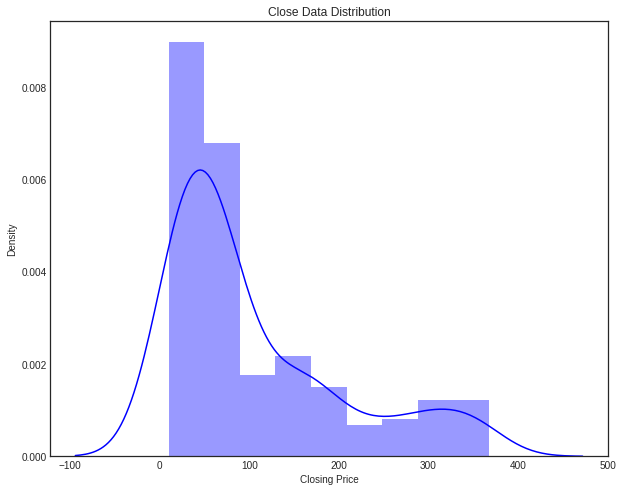

In [21]:
# Dependent variable 'Close price'
plt.figure(figsize=(10,8))
sns.distplot(df['Close'],color="b")
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')
plt.show()

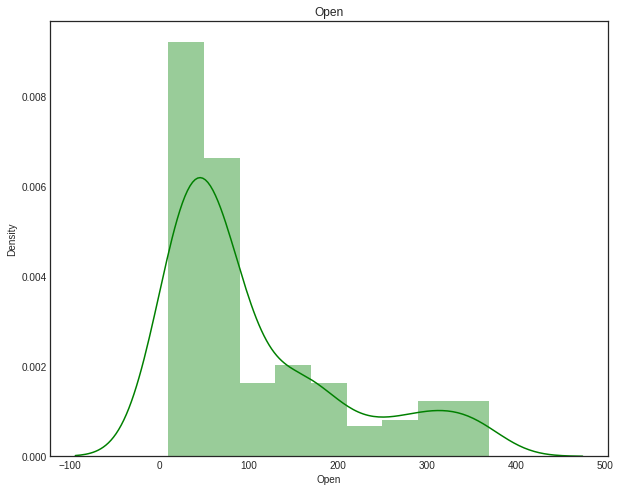

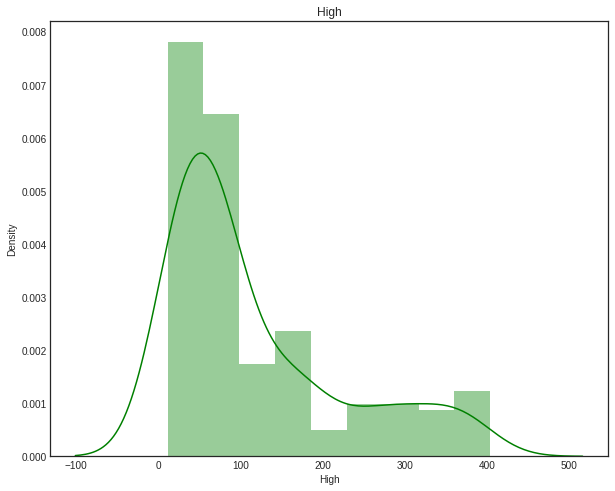

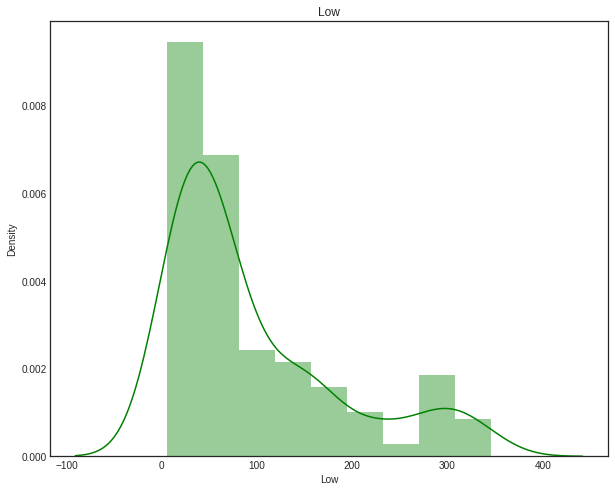

In [22]:
# Independent variable 'Close price'
for column in df.iloc[:,1:4]:
  plt.figure(figsize=(10,8))
  sns.distplot(df[column],color="g")
  plt.title(column)
  plt.xlabel(column)
  plt.show()

In [ ]:
# visualise the data
fig = px.line(df, df['Date'], df['Close'], title='Monthly close price')
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Close price'),
    autosize=False,
    width=1500,
    height=600)

fig.show()

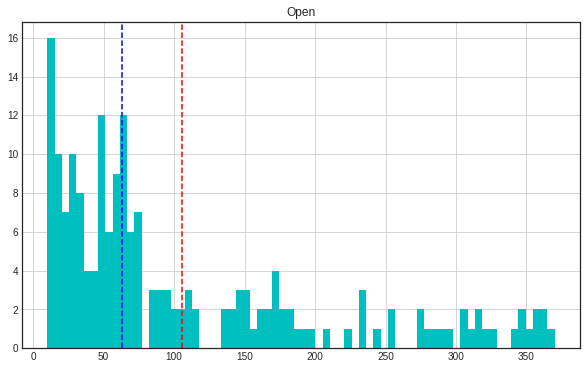

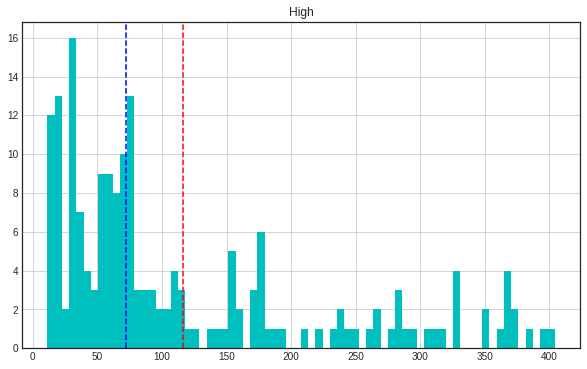

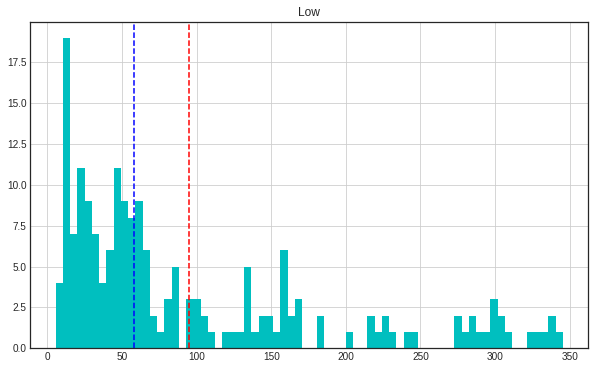

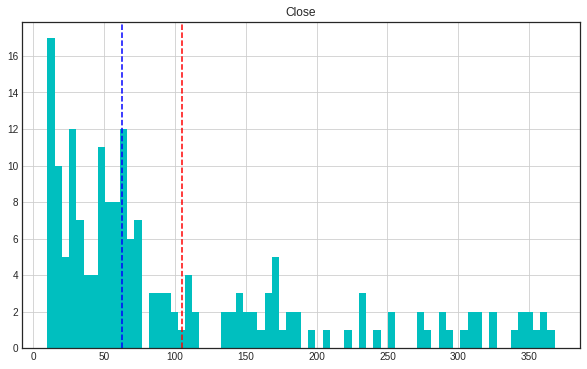

In [24]:
# Check for skewness in the dataset
numerical_features = df.describe().columns
for column in numerical_features[0:4]:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.gca()
    feature = df[column]
    feature.hist(bins=70, ax = ax, color = "c")
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=1.5)
    ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=1.5)    
    ax.set_title(column)
plt.show()

**Scatter plot**

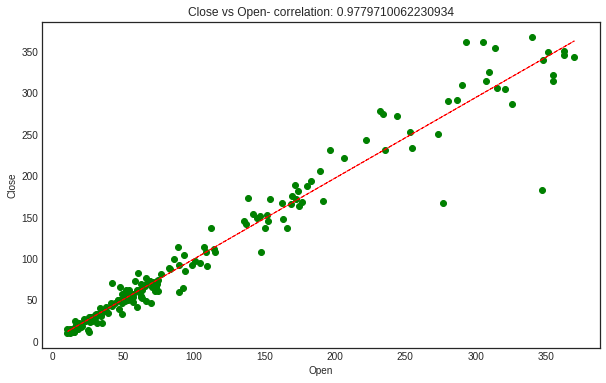

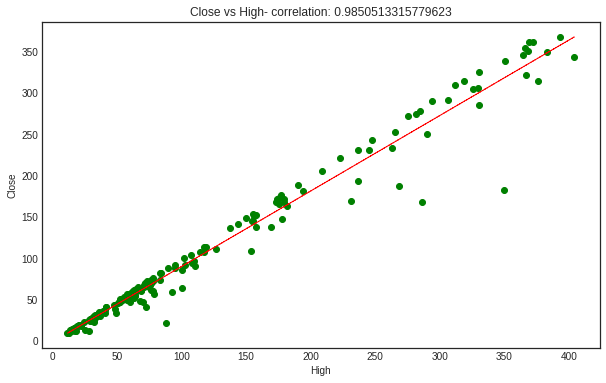

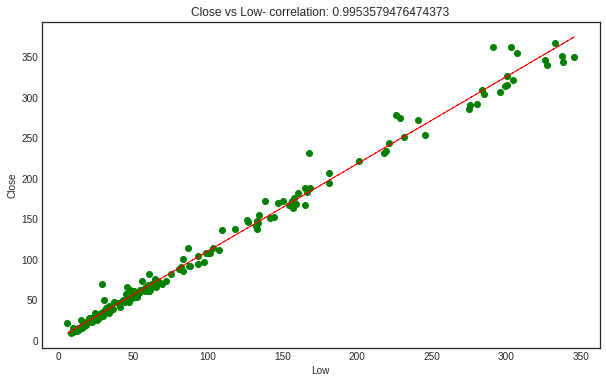

In [25]:
for column in numerical_features[0:3]:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.gca()
    feature = df[column]
    label = df['Close']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label, color='g')
    plt.xlabel(column)
    plt.ylabel('Close')
    ax.set_title('Close vs ' + column + '- correlation: ' + str(correlation))
    z = np.polyfit(df[column], df['Close'], 1)
    y_hat = np.poly1d(z)(df[column])

    plt.plot(df[column], y_hat, "r--", lw=1)

plt.show()

**Correlation Heatmap**

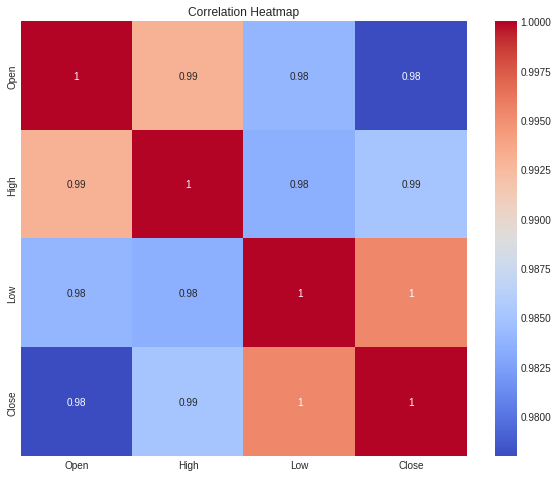

In [26]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,8))
plt.title('Correlation Heatmap')
cor = sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

* We found from above heatmap and scatter plot that each feature is highly correlated with each other.

* Taking just one feature or average of these features would suffice for our regression model as linear regression assumes there is no multicolinearity in the features.

***Feature Engineering & Data Pre-processing***

In [27]:
# Creating a new feature based on average of other features in the dataset
df['avg_of_independent'] = df.iloc[:,1:4].mean(axis=1).round(2)
df.head()

,Date,Open,High,Low,Close,avg_of_independent
0,2005-07-01,13.00,14.00,11.25,12.46,12.75
1,2005-08-01,12.58,14.88,12.55,13.42,13.34
2,2005-09-01,13.48,14.87,12.27,13.30,13.54
3,2005-10-01,13.20,14.47,12.40,12.99,13.36
4,2005-11-01,13.35,13.88,12.88,13.41,13.37


Linear regression also assumes a linear relationship between the Dependent variables and independent variables, let's check if such relationship exists through a scatter plot

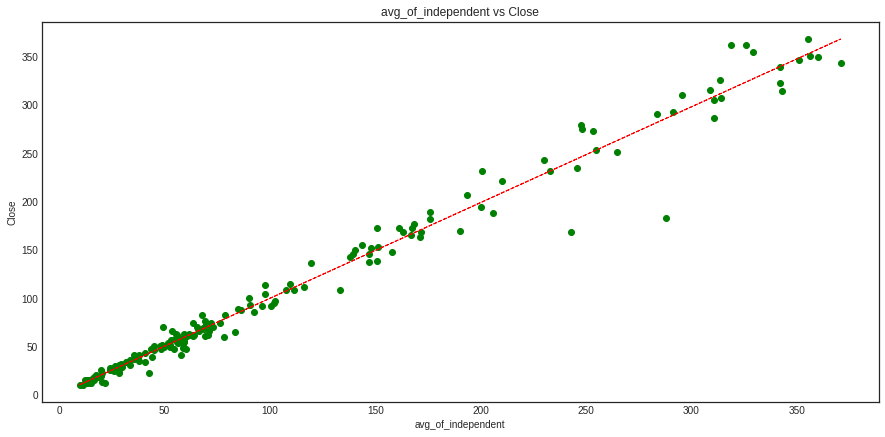

In [28]:
# scatter plot to see the relationship between dependent & independent variables
fig = plt.figure(figsize=(15,7))
ax = fig.gca()
plt.scatter(df['avg_of_independent'], df['Close'], color='g')
plt.xlabel('avg_of_independent')
plt.ylabel('Close')
ax.set_title('avg_of_independent vs Close')
z = np.polyfit(df['avg_of_independent'], df['Close'], 1)
y_hat = np.poly1d(z)(df['avg_of_independent'])
plt.plot(df['avg_of_independent'], y_hat, "r--", lw=1)
plt.show()

Manipulate Features to correlation between features and create new features

In [29]:
# use lags as additional features
for i in range(1,13):
    df[f"avg_lag{i}"] = df['avg_of_independent'].shift(i)

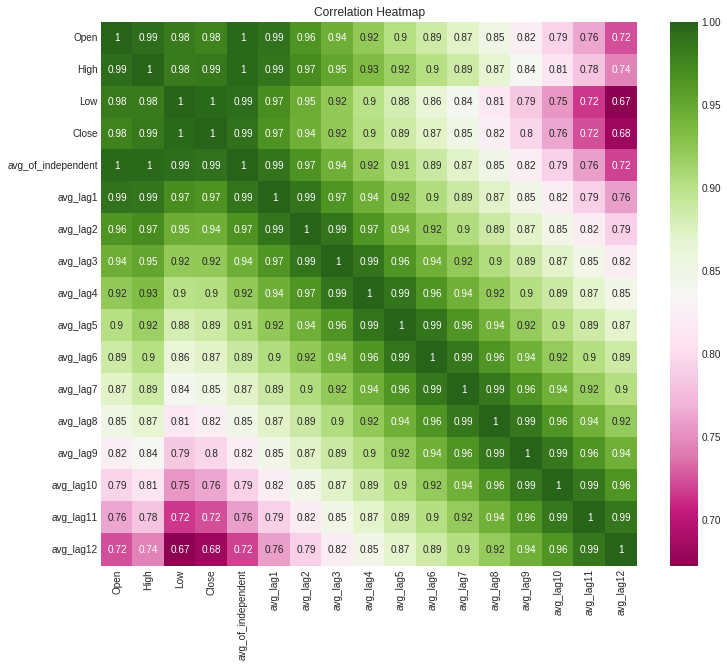

In [30]:
# correlation between features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="PiYG")
plt.title('Correlation Heatmap')
plt.show()

To reduce multicollinearity we can use regularization that means to keep all the features but reducing the magnitude of the coefficients of the model. This is a good solution when each predictor contributes to predict the dependent variable.

**Split the dataset**

In [31]:
# choose appropriate dependent and independent variables
y = df.dropna().Close
#X = df.dropna().drop(['Date','Close'], axis=1)
X = df.dropna().drop(['Date','Close','Open','High','Low'], axis=1)
 
 

# split the dataset into train and test sets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 42) 
print(X_train.shape)
print(X_test.shape)

(138, 13)
(35, 13)


In [32]:
X_train

,avg_of_independent,avg_lag1,avg_lag2,avg_lag3,avg_lag4,avg_lag5,avg_lag6,avg_lag7,avg_lag8,avg_lag9,avg_lag10,avg_lag11,avg_lag12
166,158.13,242.73,248.23,200.52,200.10,176.17,190.13,205.68,287.78,370.65,355.27,341.82,350.98
148,313.77,343.12,359.92,356.30,318.61,291.07,310.48,313.46,295.26,283.40,247.53,232.88,245.61
159,205.68,287.78,370.65,355.27,341.82,350.98,325.68,310.53,342.05,329.12,308.95,313.77,343.12
63,71.70,65.68,62.43,55.84,56.40,55.23,52.98,49.05,48.36,52.53,51.75,48.13,43.45
138,247.53,232.88,245.61,254.90,264.83,253.23,230.16,210.18,193.36,175.93,150.76,147.00,140.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,66.06,66.61,72.94,71.03,68.10,53.51,54.73,59.31,55.57,55.76,59.12,64.12,59.53
118,168.25,163.38,171.20,167.49,161.29,143.69,137.82,119.70,116.21,109.80,107.78,111.33,97.79
26,38.15,35.57,37.35,33.56,31.97,28.40,28.06,29.87,29.52,26.49,24.22,20.49,17.89
104,68.07,60.89,70.63,76.34,71.97,63.51,57.65,59.01,83.50,96.36,102.54,90.31,92.52


In [33]:
y_train

166    147.95
148    306.80
159    188.05
63      71.86
138    279.10
        ...  
83      67.83
118    176.52
26      41.36
104     82.70
114    172.50
Name: Close, Length: 138, dtype: float64

***ML Model Implementation***

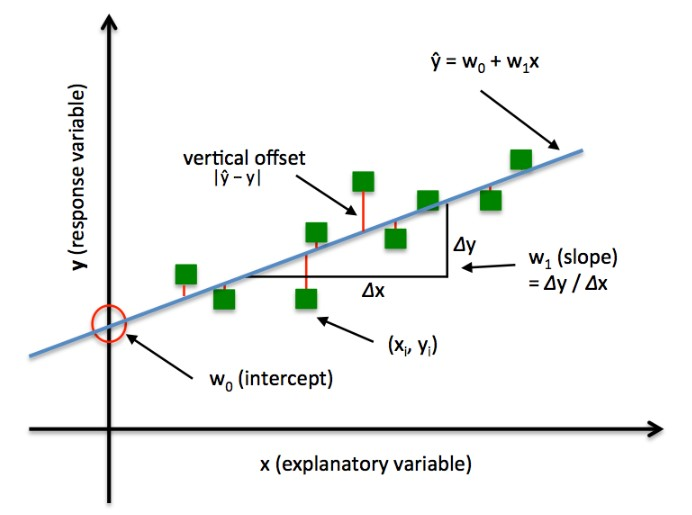

Models Selection

In [34]:
def error(y_pred):
  MSE  = mean_squared_error((y_test), (y_pred))
  print("MSE :" , MSE, '\n')

  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE, '\n')

  r2 = r2_score((y_test), (y_pred))
  print("R2 :" ,r2, '\n')

  r2_adjusted = 1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",r2_adjusted ,'\n')

  MAE = mean_absolute_error(y_test, y_pred)
  print('MAE:', MAE, '\n')

  MAPE = mean_absolute_percentage_error(y_test, y_pred)
  print('MAPE:', MAPE, '\n')

  return MSE, RMSE ,r2, r2_adjusted, MAE, MAPE

In [35]:
# List to store the model scores
model_score_list = []

# Regressor model List
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet' : ElasticNet(alpha=0.1, l1_ratio=0.5),
    'SVR_RBF': SVR( kernel='rbf'),
    'SVR_Linear': SVR( kernel='linear'),
    'SVR_Poly': SVR( kernel='poly'),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'ExtraTreesRegressor': ExtraTreesRegressor(random_state=42),
    'AdaBoostRegressor': AdaBoostRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'LGBMRegressor': LGBMRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42)
}

for key in models.keys():
    print(key)
    print('---------------------------')
    
    models[key].fit(X_train, y_train)
    y_pred = models[key].predict(X_test)

    MSE, RMSE ,r2, r2_adjusted, MAE, MAPE = error(y_pred)
    
    # Add the model scores to score list 
    model_score_list.append({'model_name': key, 'mse':MSE,'rmse': RMSE, 'r2_score': r2, 'r2_adjusted': r2_adjusted, 'mae': MAE, 'mape': MAPE})

    print('\n')
    
# Convert the model scores to dataframe
model_score_df = pd.DataFrame(model_score_list, columns=['model_name', 'mse', 'rmse', 'r2_score','r2_adjusted', 'mae', 'mape'])

# Order by highest recall score and roc_auc_score
model_score_df.sort_values(['r2_score'], ascending=False)

LinearRegression
---------------------------
MSE : 304.2954390673306 

RMSE : 17.444066013040956 

R2 : 0.9680326314752485 

Adjusted R2 :  0.9482433081027833 

MAE: 9.232405267754203 

MAPE: 0.08150902985350918 



Ridge
---------------------------
MSE : 304.4178138903596 

RMSE : 17.447573295170866 

R2 : 0.9680197755445848 

Adjusted R2 :  0.9482224937388517 

MAE: 9.233406808392138 

MAPE: 0.08151817847976835 



Lasso
---------------------------
MSE : 355.15244378756677 

RMSE : 18.8454886852946 

R2 : 0.9626899138290695 

Adjusted R2 :  0.9395931938184936 

MAE: 9.55392417719846 

MAPE: 0.08468601588457172 



ElasticNet
---------------------------
MSE : 323.06254443365157 

RMSE : 17.97394070407632 

R2 : 0.9660610772014585 

Adjusted R2 :  0.9450512678499804 

MAE: 9.383426435558928 

MAPE: 0.08304703167886959 



SVR_RBF
---------------------------
MSE : 7581.8787109352415 

RMSE : 87.07398412232692 

R2 : 0.203495420091376 

Adjusted R2 :  -0.2895788436615818 

MAE: 54.039916

,model_name,mse,rmse,r2_score,r2_adjusted,mae,mape
0,LinearRegression,304.295439,17.444066,0.968033,0.948243,9.232405,0.081509
1,Ridge,304.417814,17.447573,0.968020,0.948222,9.233407,0.081518
3,ElasticNet,323.062544,17.973941,0.966061,0.945051,9.383426,0.083047
2,Lasso,355.152444,18.845489,0.962690,0.939593,9.553924,0.084686
5,SVR_Linear,366.364607,19.140653,0.961512,0.937686,9.699634,0.086292
12,XGBRegressor,648.543550,25.466518,0.931868,0.889691,12.559255,0.124489
8,ExtraTreesRegressor,699.123203,26.440938,0.926555,0.881088,12.147111,0.110178
10,GradientBoostingRegressor,775.130293,27.841162,0.918570,0.868160,13.215338,0.125444
9,AdaBoostRegressor,825.610409,28.733437,0.913267,0.859574,14.943823,0.224161
7,RandomForestRegressor,871.981922,29.529340,0.908395,0.851687,13.117926,0.126849


ML Model - *Linear Regression*


In [36]:
# Linear Regression
model_1 = LinearRegression().fit(X_train, y_train)

In [37]:
model_1.score(X_train, y_train)

0.9921249497081313

In [38]:
# Model Prediction
linear_y_pred = model_1.predict(X_test)

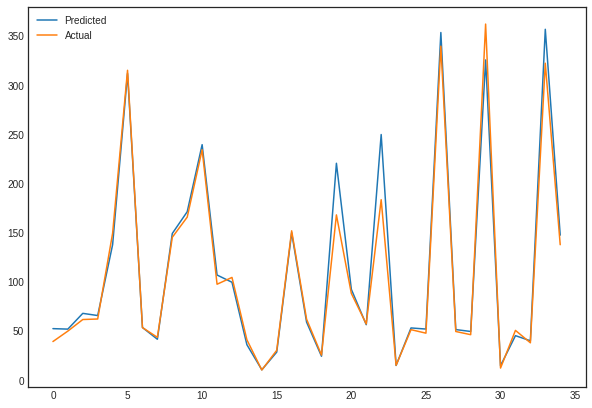

In [39]:
plt.figure(figsize=(10,7))
plt.plot((linear_y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [81]:
# evaluate predictions
error(linear_y_pred)     

MSE : 304.2954390673306 

RMSE : 17.444066013040956 

R2 : 0.9680326314752485 

Adjusted R2 :  0.9482433081027833 

MAE: 9.232405267754203 

MAPE: 0.08150902985350918 



(304.2954390673306,
 17.444066013040956,
 0.9680326314752485,
 0.9482433081027833,
 9.232405267754203,
 0.08150902985350918)

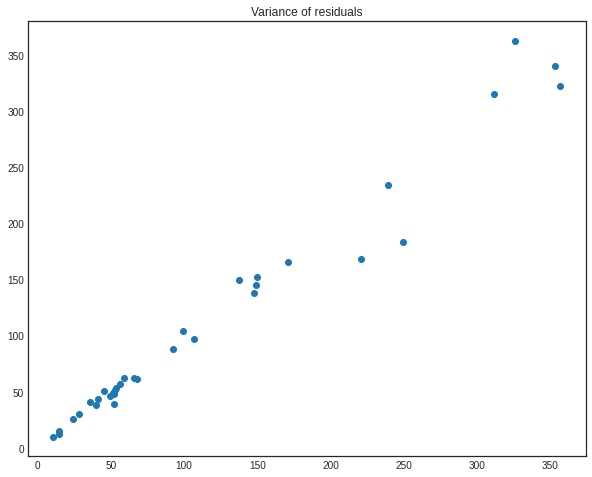

In [41]:
# Homoscadacity
plt.figure(figsize=(10,8))
plt.scatter(linear_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

ML Model - *Lasso Regression*

In [42]:
# Lasso Regression
model_2  = Lasso()

model_2.fit(X_train, y_train)

Lasso()

In [43]:
model_2.score(X_train, y_train)

0.9919926924823252

In [44]:
# Model Prediction
lasso_y_pred = model_2.predict(X_test)

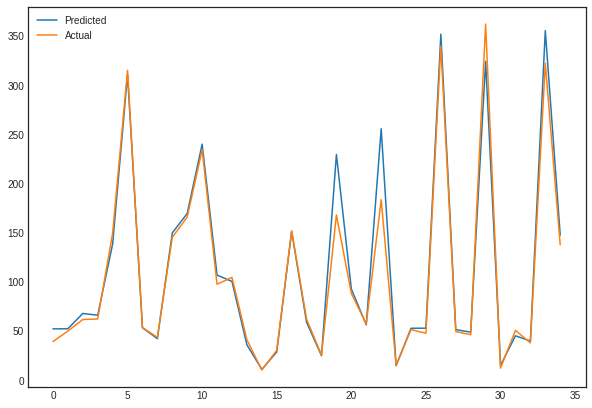

In [45]:
plt.figure(figsize=(10,7))
plt.plot((lasso_y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()


In [46]:
#evaluate predictions
error(lasso_y_pred)

MSE : 355.15244378756677 

RMSE : 18.8454886852946 

R2 : 0.9626899138290695 

Adjusted R2 :  0.9395931938184936 

MAE: 9.55392417719846 

MAPE: 0.08468601588457172 



(355.15244378756677,
 18.8454886852946,
 0.9626899138290695,
 0.9395931938184936,
 9.55392417719846,
 0.08468601588457172)

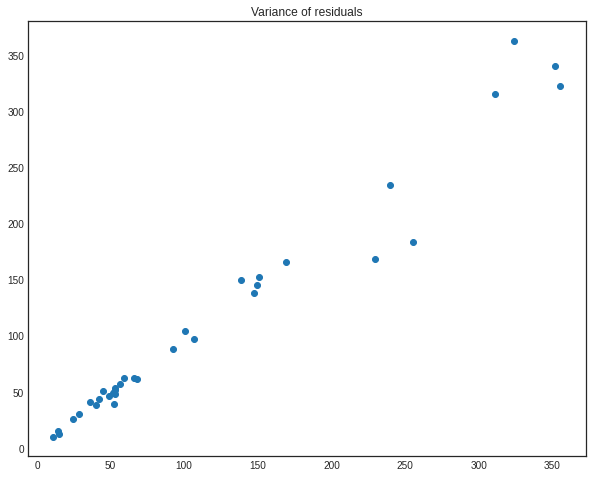

In [47]:
# Homoscadacity
plt.figure(figsize=(10,8))
plt.scatter(lasso_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

ML Model - *Ridge Regression* 

In [48]:
# Ridge Regression
model_3 = Ridge()

In [49]:
model_3.fit(X_train,y_train)

Ridge()

In [50]:
model_3.score(X_train, y_train)

0.9921249489706416

In [51]:
# Model Prediction
y_pred_r = model_3.predict(X_test)

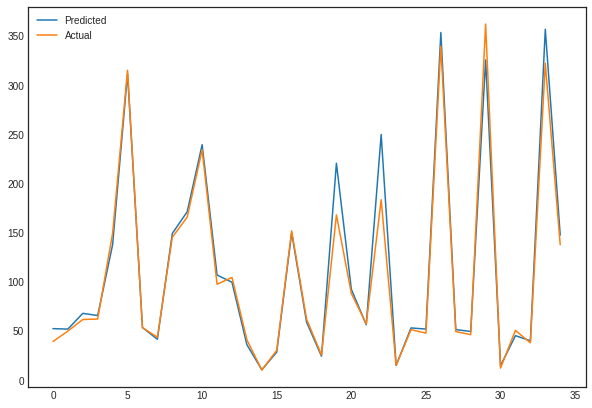

In [52]:
plt.figure(figsize=(10,7))
plt.plot((y_pred_r))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [53]:
#Evaluate predictions
error(y_pred_r)

MSE : 304.4178138903596 

RMSE : 17.447573295170866 

R2 : 0.9680197755445848 

Adjusted R2 :  0.9482224937388517 

MAE: 9.233406808392138 

MAPE: 0.08151817847976835 



(304.4178138903596,
 17.447573295170866,
 0.9680197755445848,
 0.9482224937388517,
 9.233406808392138,
 0.08151817847976835)

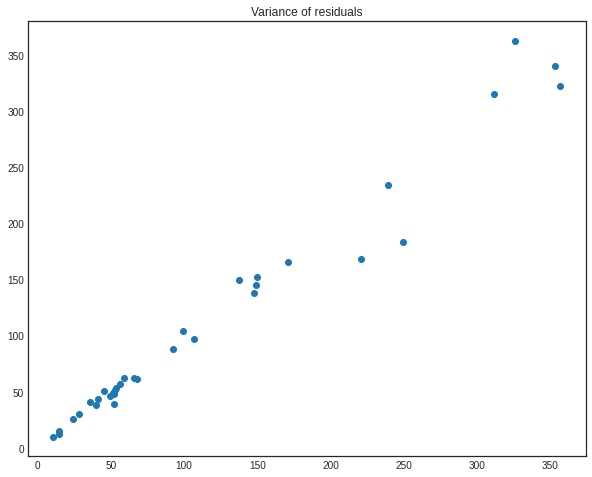

In [54]:
# Homoscadacity
plt.figure(figsize=(10,8))
plt.scatter(y_pred_r, y_test)
plt.title('Variance of residuals')
plt.show()

ML Model - **Elastic net Regression**

In [55]:
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
model_4 = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [56]:
model_4.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [57]:
model_4.score(X_train, y_train)

0.992103108452855

In [58]:
# Model Prediction
y_pred_en = model_4.predict(X_test)

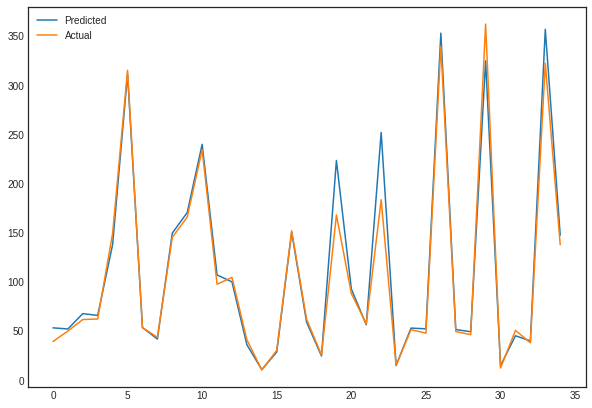

In [59]:
plt.figure(figsize=(10,7))
plt.plot((y_pred_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [60]:
#Evaluate predictions
error(y_pred_en)

MSE : 323.06254443365157 

RMSE : 17.97394070407632 

R2 : 0.9660610772014585 

Adjusted R2 :  0.9450512678499804 

MAE: 9.383426435558928 

MAPE: 0.08304703167886959 



(323.06254443365157,
 17.97394070407632,
 0.9660610772014585,
 0.9450512678499804,
 9.383426435558928,
 0.08304703167886959)

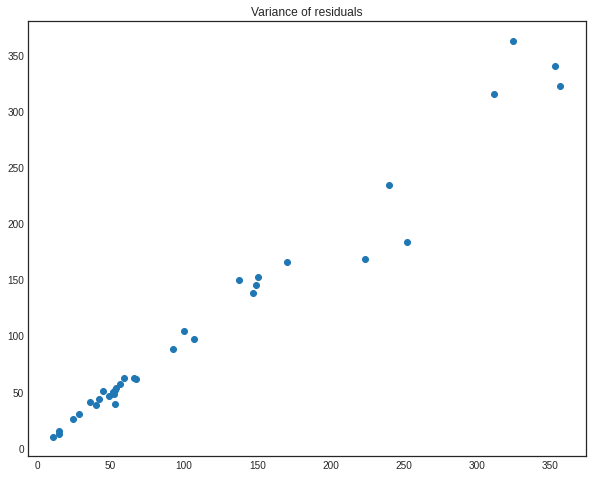

In [61]:
# Homoscadacity
plt.figure(figsize=(10,8))
plt.scatter(y_pred_en, y_test)
plt.title('Variance of residuals')
plt.show()

ML Model - *Support Vector Regression (SVR)_linear*

In [62]:
#  Regression
model_5 = SVR( kernel='linear').fit(X_train, y_train)

In [63]:
model_5.score(X_train, y_train)

0.9911315692830055

In [64]:
# Model Prediction
svr_y_pred = model_5.predict(X_test)

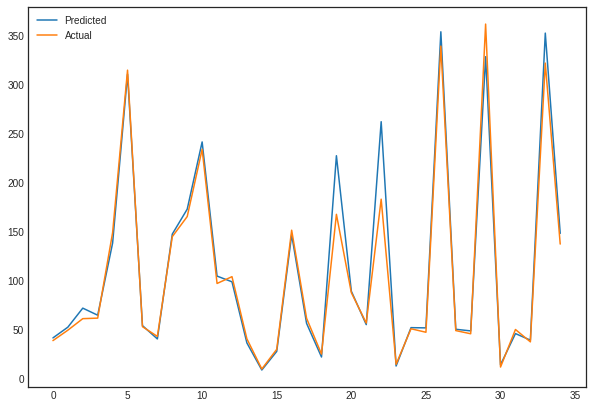

In [65]:
plt.figure(figsize=(10,7))
plt.plot((svr_y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [66]:
# evaluate predictions
error(svr_y_pred)

MSE : 366.3646073920817 

RMSE : 19.14065326450698 

R2 : 0.9615120343084171 

Adjusted R2 :  0.9376861507850563 

MAE: 9.699634179416028 

MAPE: 0.08629168191565759 



(366.3646073920817,
 19.14065326450698,
 0.9615120343084171,
 0.9376861507850563,
 9.699634179416028,
 0.08629168191565759)

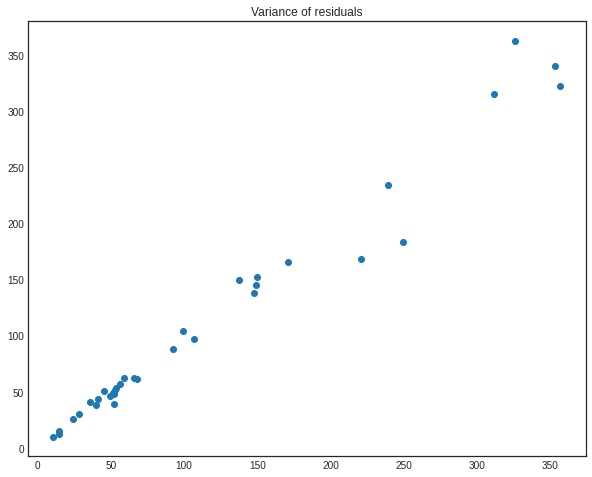

In [67]:
# Homoscadacity
plt.figure(figsize=(10,8))
plt.scatter(linear_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

**Model Pipeline**

As parameters to the function, you can pass in your data, a model, and different hyperparameters for tuning.

In [68]:
# Create model pipeline
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data,
                       model, param_grid, cv=10, scoring_fit='r2',
                       scoring_test=r2_score, do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv,
        n_jobs=-1,
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    best_model = fitted_model.best_estimator_

    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)

    score = scoring_test(y_test_data, pred)

    return [best_model, pred, score]

**Hyperparameter Tuning**

Next, we define the hyperparameters for tuning along with the models. We will tune the hyperparameters for the top 5 models LinearRegression, Ridge, ElasticNet, Lasso, SVR_Linear from the above results. First, we import and instantiate the classes for the models, then we define some parameters to input into the grid search function.

In [69]:
# Defining our estimator, the algorithm to optimize
models_to_train = [ LinearRegression(), 
                   Lasso(),
                   Ridge(), 
                   SVR( kernel='linear'),
                   ElasticNet()]

# Defining the hyperparameters to optimize
grid_parameters = [
    { # LinearRegression
    },
    { # Lasso
        'alpha':[ 1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2,
                 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]
    },
    { # Ridge
         'alpha':[ 1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2,
                  1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100 ]
    },
    { # SVR_linear
         'kernel': ['linear'], 'C': [1, 10]
    },
    { # ElasticNet
      'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,
                1,5,10,20,30,40,45,50,55,60,100],
     'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]
    }
]

Now that we have defined all of the models and hyperparameters for tuning, we can simply input our data into the function defined earlier.

In [70]:
models_preds_scores = []

for i, model in enumerate(models_to_train):
    params = grid_parameters[i]

    result = algorithm_pipeline(X_train, X_test, y_train, y_test,
                                 model, params, cv=10)
    models_preds_scores.append(result)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 120 candidates, totalling 1200 fits


In [71]:
for result in models_preds_scores:
    print('Model: {0}, Score: {1}'.format(type(result[0]).__name__, result[2]))

Model: LinearRegression, Score: 0.9680326314752485
Model: Lasso, Score: 0.951656557457282
Model: Ridge, Score: 0.966814984348395
Model: SVR, Score: 0.9615120343084171
Model: ElasticNet, Score: 0.9470852932682392


We go with the *Linear Regression* which is consistent and also has high accuracy score in cross validation 

Final Model Building - *Linear Regression*

In [72]:
# Linear Regression
final_model = LinearRegression().fit(X_train, y_train)

In [73]:
final_model.score(X_train, y_train)

0.9921249497081313

In [74]:
# Model Prediction
final_y_pred = model_1.predict(X_test)

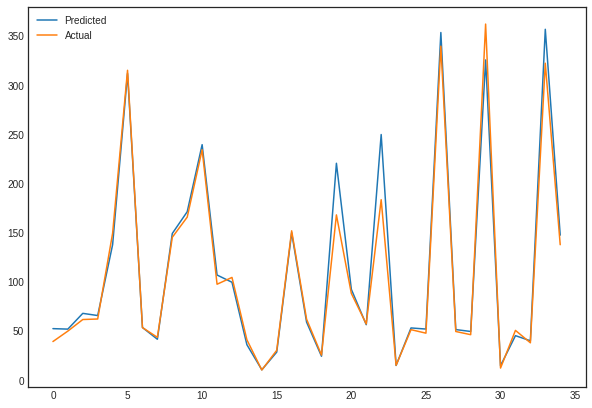

In [75]:
plt.figure(figsize=(10,7))
plt.plot((final_y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [76]:
# evaluate predictions
error(final_y_pred)

MSE : 304.2954390673306 

RMSE : 17.444066013040956 

R2 : 0.9680326314752485 

Adjusted R2 :  0.9482433081027833 

MAE: 9.232405267754203 

MAPE: 0.08150902985350918 



(304.2954390673306,
 17.444066013040956,
 0.9680326314752485,
 0.9482433081027833,
 9.232405267754203,
 0.08150902985350918)

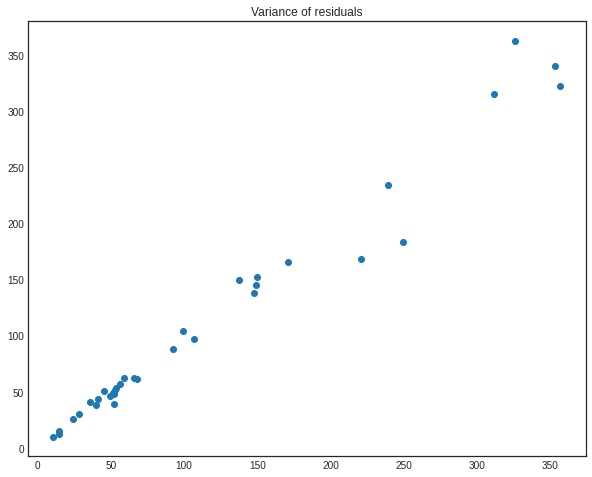

In [77]:
# Homoscadacity
plt.figure(figsize=(10,8))
plt.scatter(linear_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

In [78]:
# Model Prediction
final_y_pred = final_model.predict(X_test)

In [79]:
#Prepare the Final submission dataframe
result_df = pd.DataFrame({'closing_prince':y_test,'prediction':np.round(final_y_pred,2)})
result_df.sample(10)

,closing_prince,prediction
126,149.38,137.73
155,339.60,353.47
151,322.25,356.74
158,183.45,249.72
125,145.23,149.09
30,50.54,45.19
24,37.93,39.98
174,39.20,52.33
120,165.74,171.22
53,53.41,53.47


**Conclusion**

* At we first started with data inspection, viewed the data distribution, checked for correlation and used averaged features to remove correlation.
* A simple linear regression model was built and it was evaluated using accuracy, mean squared error, root mean squared error, r2_score, r2_adjusted and mean absolute percentage error.
* Additional features were engineered by taking lags and reduced the effect of multi collinearity using regularization techniques such as ridge, lasso and elastic net regression.
* We implemented linear regression and the accuracy (r2_score) of our linear regression model is high as compared to another models.
* After that we visualise the performance of our linear regression model and graph show that we achieve the almost best fit model for our dataset.